In [1]:
import pandas as pd
import numpy as np 
import sqlite3
from  functions import draw_result
from functions import table_and_get_restult
from matplotlib import pyplot as plt

In [ ]:
import yaml 

with open('consts.yaml') as f:
    templates = yaml.safe_load(f)

In [3]:
final = data.drop_duplicates(subset={"label","text"},keep='first',inplace=False)
final.shape

(299909, 3)

In [4]:
import re
def cleanhtml(sentence):
    cleanr1 = re.compile('/.*?')
    cleantext = re.sub(cleanr1,' ',sentence)
    cleanr = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    cleantext = re.sub(cleanr,' ',sentence)
    return cleantext

In [5]:
from bengali_stemmer.rafikamal2014 import RafiStemmer
stemmer = RafiStemmer()

In [6]:
stopwords = pd.read_csv(templates['path_to_table'])

In [7]:
def to_encode(bangla_word):
    return bangla_word.encode('utf-8')


def to_decode(bangla_word):
    return bangla_word.decode('utf-8')
set_stop = set(stopwords['words'].map(to_encode))

In [8]:
def clean_punct(sentence):
    cleaned = re.sub(r'[?|!|\'|"|#|।|’|‘]', r'', sentence)
    cleaned1 = re.sub(r'[.|,|(|)|\|/]', r'', cleaned)
    cleaned = re.sub(r'[০|১|২|৩|৪|৫|৬|৭|৮|৯]', r'', cleaned1)
    cleaned1 = re.sub(r'[-|=]', r' ', cleaned)
    cleaned = re.sub(r'[a-zA-Z]', r'', cleaned1)
    cleaned1 = re.sub(r'[0-9]', r'', cleaned)
    return cleaned1

In [9]:
def pre_process(data):
    i=0
    str1=' '
    final_string = []
    final_words = []
    
    s=''

    for sentence in data:
        filtered_sentence = []

        for w in sentence.split():
            for cleaned_word1 in cleanhtml(w).split():
                for cleaned_word in clean_punct(cleaned_word1).split():
                    if len(cleaned_word)>2:
                        if(to_encode(cleaned_word) not in set_stop):
                            s = stemmer.stem_word(cleaned_word)
                            if len(s)>2:
                                final_words.append(s)
                                filtered_sentence.append(s)
                        else:
                            continue
                    else:
                        continue

        str1 = " ".join(filtered_sentence)
        final_string.append(str1)
    return final_string

In [10]:
X_train = pre_process(final['text'].values)
y_train = final['label'].values

In [11]:
data1 = pd.read_csv(templates['path_to_test_table'])
data1.shape

(75243, 3)

In [12]:
final1=data1.drop_duplicates(subset={"label","text"},keep='first',inplace=False)
final1.shape

(75150, 3)

In [13]:
X_test = pre_process(final1['text'].values)
y_test = final1['label'].values

In [14]:
labels=np.unique(y_train)

In [15]:
labels

array(['eco', 'ent', 'int', 'sprt', 'state'], dtype=object)

## SVM

In [17]:
y_pred = table_and_get_restult(SGDClassifier(loss='hinge',
                                             penalty='l2',
                                             alpha=1e-3,
                                             random_state=templates['seed'],
                                             tol=None),
                               X_train,
                               y_train,
                               X_test,
                               y_test)

Cross val score: [0.85679515 0.85697614 0.85567577 0.85806936 0.85906734]
Accuracy of Model with Cross Validation is: 85.73167520206889
accuracy 0.8564870259481038
accuracy normalized 64365
              precision    recall  f1-score   support

         eco       0.93      0.23      0.37      3796
         ent       0.92      0.69      0.79      6194
         int       0.94      0.29      0.44      6439
        sprt       0.93      0.90      0.92     10176
       state       0.83      0.99      0.91     48545

    accuracy                           0.86     75150
   macro avg       0.91      0.62      0.68     75150
weighted avg       0.87      0.86      0.83     75150



# SVM Trainning accuracy

In [18]:
from sklearn.metrics import classification_report
y_pred = svm.predict(X_train)


print('accuracy %s' % accuracy_score(y_pred, y_train))
print('accuracy normalized %s' % accuracy_score(y_pred, y_train, normalize=False))
print(classification_report(y_train, y_pred,target_names=labels))

accuracy 0.8576301478115028
accuracy normalized 257211
              precision    recall  f1-score   support

         eco       0.93      0.22      0.36     15168
         ent       0.92      0.70      0.80     24454
         int       0.94      0.29      0.45     25748
        sprt       0.93      0.90      0.92     40683
       state       0.84      0.99      0.91    193856

    accuracy                           0.86    299909
   macro avg       0.91      0.62      0.69    299909
weighted avg       0.87      0.86      0.83    299909



# Naive Bayes

In [18]:
y_pred = table_and_get_restult(MultinomialNB(alpha=.01), X_train, y_train, X_test, y_test)

Cross val score: [0.90520806 0.90684027 0.90550656 0.90765255 0.90623385]
accuracy 0.907185628742515
accuracy normalized 68175
              precision    recall  f1-score   support

         eco       0.83      0.58      0.68      3796
         ent       0.90      0.81      0.85      6194
         int       0.88      0.67      0.76      6439
        sprt       0.97      0.91      0.94     10176
       state       0.90      0.98      0.94     48545

    accuracy                           0.91     75150
   macro avg       0.90      0.79      0.84     75150
weighted avg       0.91      0.91      0.90     75150



# NB Confusion matrix

Confusion matrix, without normalization
[[ 2216    25    67    25  1463]
 [    3  5025    65   149   952]
 [   32   109  4307    89  1902]
 [    2    68    74  9273   759]
 [  427   354   355    55 47354]]
Normalized confusion matrix
[[5.84e-01 6.59e-03 1.77e-02 6.59e-03 3.85e-01]
 [4.84e-04 8.11e-01 1.05e-02 2.41e-02 1.54e-01]
 [4.97e-03 1.69e-02 6.69e-01 1.38e-02 2.95e-01]
 [1.97e-04 6.68e-03 7.27e-03 9.11e-01 7.46e-02]
 [8.80e-03 7.29e-03 7.31e-03 1.13e-03 9.75e-01]]


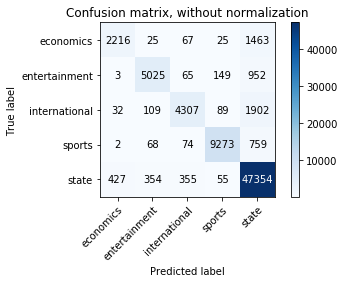

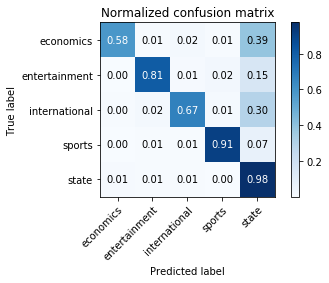

In [22]:
draw_result(y_test, y_pred)

# NB TRAINING ACCURACY

In [ ]:
labels=np.unique(y_train)

In [30]:
y_pred = table_and_get_restult(MultinomialNB(alpha=.01), X_train, y_train, X_test, y_test)

accuracy 0.9201724523105342
accuracy normalized 275968
              precision    recall  f1-score   support

         eco       0.85      0.64      0.73     15168
         ent       0.91      0.85      0.88     24454
         int       0.90      0.73      0.81     25748
        sprt       0.98      0.92      0.95     40683
       state       0.92      0.98      0.95    193856

    accuracy                           0.92    299909
   macro avg       0.91      0.82      0.86    299909
weighted avg       0.92      0.92      0.92    299909



Cross val score: [0.86 0.86 0.86 0.86 0.86]

# Random forest

In [18]:
y_pred = table_and_get_restult(RandomForestClassifier ( n_estimators=100 ), X_train, y_train, X_test, y_test)

accuracy 0.8654690618762475
accuracy normalized 65040
              precision    recall  f1-score   support

         eco       0.94      0.26      0.41      3796
         ent       0.97      0.69      0.80      6194
         int       0.96      0.36      0.52      6439
        sprt       0.95      0.90      0.92     10176
       state       0.84      1.00      0.91     48545

    accuracy                           0.87     75150
   macro avg       0.93      0.64      0.71     75150
weighted avg       0.88      0.87      0.84     75150



Cross val score: [0.86 0.86 0.86 0.86 0.86]

Accuracy of Model with Cross Validation is: 86.00142078087248

# RF Confusion matrix

Confusion matrix, without normalization
[[  985     4    21    29  2757]
 [    1  4245    16   249  1683]
 [    3    63  2290   177  3906]
 [    0    41    18  9200   917]
 [   56    45    45    79 48320]]
Normalized confusion matrix
[[2.59e-01 1.05e-03 5.53e-03 7.64e-03 7.26e-01]
 [1.61e-04 6.85e-01 2.58e-03 4.02e-02 2.72e-01]
 [4.66e-04 9.78e-03 3.56e-01 2.75e-02 6.07e-01]
 [0.00e+00 4.03e-03 1.77e-03 9.04e-01 9.01e-02]
 [1.15e-03 9.27e-04 9.27e-04 1.63e-03 9.95e-01]]


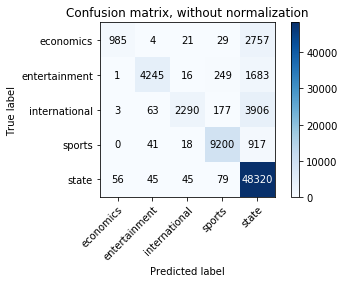

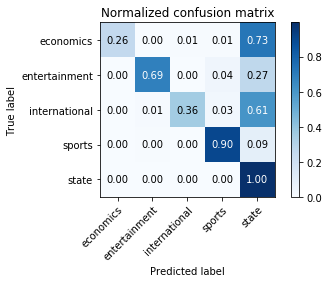

In [20]:
draw_result(y_test, y_pred)

# decision tree #

In [17]:
y_pred = table_and_get_restult(DecisionTreeClassifier(), X_train, y_train, X_test, y_test)

accuracy 0.8445508982035929
accuracy normalized 63468
              precision    recall  f1-score   support

         eco       0.55      0.53      0.54      3796
         ent       0.76      0.73      0.75      6194
         int       0.62      0.60      0.61      6439
        sprt       0.84      0.83      0.84     10176
       state       0.90      0.92      0.91     48545

    accuracy                           0.84     75150
   macro avg       0.74      0.72      0.73     75150
weighted avg       0.84      0.84      0.84     75150



[0.83909042 0.84375573 0.83768734 0.83827943 0.83917705]
Accuracy of Model with Cross Validation is: 83.95979942851693

Confusion matrix, without normalization
[[ 2000    64   223    92  1417]
 [   59  4550   310   365   910]
 [  188   277  3849   514  1611]
 [   83   364   500  8464   765]
 [ 1287   737  1324   592 44605]]
Normalized confusion matrix
[[0.53 0.02 0.06 0.02 0.37]
 [0.01 0.73 0.05 0.06 0.15]
 [0.03 0.04 0.6  0.08 0.25]
 [0.01 0.04 0.05 0.83 0.08]
 [0.03 0.02 0.03 0.01 0.92]]


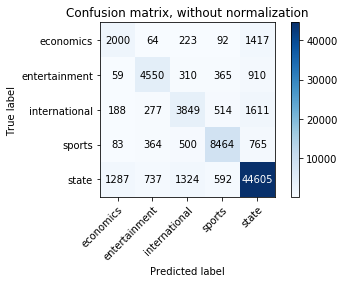

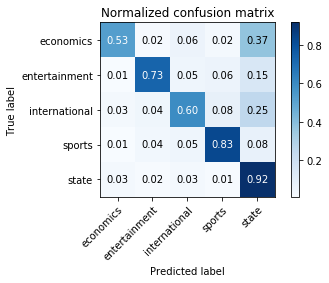

In [21]:
draw_result(y_test, y_pred)

# LR

In [22]:
y_pred = table_and_get_restult(LogisticRegression ( multi_class = 'ovr' , solver = 'lbfgs' ),
                               X_train,
                               y_train,
                               X_test,
                               y_test)

C:\Users\Nusrat Humaira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Nusrat Humaira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Nusrat Humaira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Nusrat Humaira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Nusrat Humaira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number 

Cross val score: [0.94 0.94 0.94 0.94 0.94]
accuracy 0.9393346640053227
accuracy normalized 70591
               precision    recall  f1-score   support

    economics       0.82      0.72      0.76      3796
entertainment       0.91      0.88      0.90      6194
international       0.89      0.85      0.87      6439
       sports       0.97      0.96      0.96     10176
        state       0.95      0.97      0.96     48545

     accuracy                           0.94     75150
    macro avg       0.91      0.87      0.89     75150
 weighted avg       0.94      0.94      0.94     75150



# LR without CV

In [31]:
y_pred = table_and_get_restult(LogisticRegression( multi_class = 'ovr' , solver = 'lbfgs' ),
                               X_train,
                               y_train,
                               X_test,
                               y_test)


C:\Users\Nusrat Humaira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Nusrat Humaira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Nusrat Humaira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Nusrat Humaira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Nusrat Humaira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number 

accuracy 0.9393346640053227
accuracy normalized 70591
              precision    recall  f1-score   support

         eco       0.82      0.72      0.76      3796
         ent       0.91      0.88      0.90      6194
         int       0.89      0.85      0.87      6439
        sprt       0.97      0.96      0.96     10176
       state       0.95      0.97      0.96     48545

    accuracy                           0.94     75150
   macro avg       0.91      0.87      0.89     75150
weighted avg       0.94      0.94      0.94     75150



# LR cv mean

Cross val score: [0.94 0.94 0.94 0.94 0.94]
Accuracy of Model with Cross Validation is: 93.79945262308546

# LR Confusion matrix

Confusion matrix, without normalization
[[ 2716    21    98    25   936]
 [    7  5456   104   137   490]
 [   45   121  5447    62   764]
 [    8    82    95  9737   254]
 [  531   316   352   111 47235]]
Normalized confusion matrix
[[7.15e-01 5.53e-03 2.58e-02 6.59e-03 2.47e-01]
 [1.13e-03 8.81e-01 1.68e-02 2.21e-02 7.91e-02]
 [6.99e-03 1.88e-02 8.46e-01 9.63e-03 1.19e-01]
 [7.86e-04 8.06e-03 9.34e-03 9.57e-01 2.50e-02]
 [1.09e-02 6.51e-03 7.25e-03 2.29e-03 9.73e-01]]


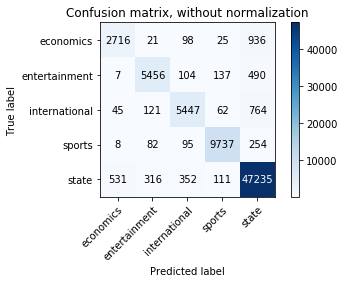

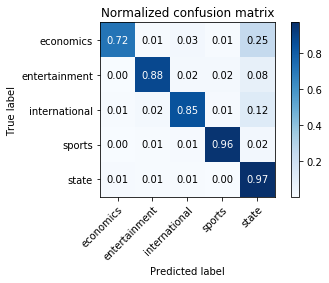

In [33]:
draw_result(y_test, y_pred)

In [34]:
labels=np.unique(y_train)

In [35]:
y_pred = table_and_get_restult(LogisticRegression ( multi_class = 'ovr' , solver = 'lbfgs' ),
                               X_train, y_train, X_test, y_test)

C:\Users\Nusrat Humaira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Nusrat Humaira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Nusrat Humaira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Nusrat Humaira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Nusrat Humaira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number 

accuracy 0.9443131083095205
accuracy normalized 283208
              precision    recall  f1-score   support

         eco       0.84      0.73      0.78     15168
         ent       0.92      0.89      0.91     24454
         int       0.90      0.86      0.88     25748
        sprt       0.97      0.96      0.97     40683
       state       0.95      0.97      0.96    193856

    accuracy                           0.94    299909
   macro avg       0.92      0.88      0.90    299909
weighted avg       0.94      0.94      0.94    299909



Confusion matrix, without normalization
[[  867     1    19     0    48]
 [   17  4278   141    62   165]
 [   30    22  1841    13    50]
 [   64   265   259  9203   106]
 [ 2818  1628  4179   898 48176]]
Normalized confusion matrix
[[0.93 0.   0.02 0.   0.05]
 [0.   0.92 0.03 0.01 0.04]
 [0.02 0.01 0.94 0.01 0.03]
 [0.01 0.03 0.03 0.93 0.01]
 [0.05 0.03 0.07 0.02 0.83]]


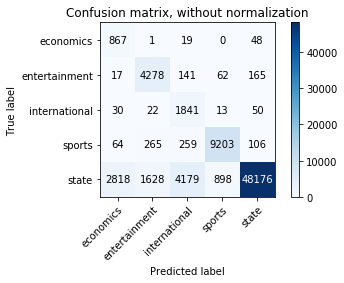

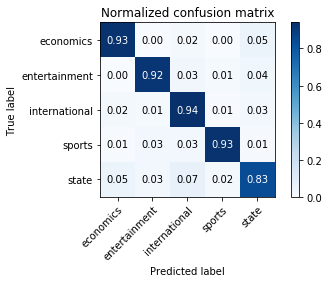

In [57]:
draw_result(y_test, y_pred)

In [10]:
from collections import Counter
Counter(x for sublist in X_train for x in sublist)

Counter({'চ': 734528,
         'া': 7639240,
         'ঁ': 130359,
         'দ': 1479977,
         'প': 2023785,
         'ু': 1386656,
         'র': 4491579,
         ' ': 11082608,
         'গ': 921456,
         'ত': 2285918,
         'ক': 2805767,
         'ল': 2321951,
         'স': 2564671,
         'ে': 2145259,
         'ম': 2330891,
         'ব': 2677350,
         'ি': 4162386,
         'ন': 3685677,
         '্': 5191358,
         'য': 1450470,
         'ী': 900237,
         'ৃ': 129939,
         'ষ': 597749,
         'শ': 1109486,
         'হ': 910361,
         'ণ': 334531,
         'অ': 469100,
         'ধ': 491989,
         'ঙ': 103279,
         'উ': 398702,
         'জ': 1141070,
         'ই': 448151,
         'ভ': 570232,
         'আ': 657293,
         'ঠ': 186929,
         'ট': 825567,
         'য়': 657639,
         'ছ': 343182,
         'থ': 433180,
         'ো': 788585,
         'ড়': 186071,
         'খ': 396999,
         'ৈ': 64574,
         'ও': 180356,
         'ড':